In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Kunal_Tweets.csv')
data.head()
print(len(data))
data.head()

281425


,Unnamed: 0,Unnamed: 0.1,tweet_id,created_at,tweet_text,likes_count,retweet_count,language,hashtags,country,city
0,0,0,1197881970484826112,Fri Nov 22 14:18:11 +0000 2019,Hafta sonunu rahat geçirmek için eşşek gibi ça...,16,0,tr,[],France,Bouy-Luxembourg
1,0,0,1198876323894218752,Mon Nov 25 08:09:24 +0000 2019,I just subscribed to @sammcallister's weekly n...,3,0,en,[],Luxembourg,Luxembourg
2,1,1,1198871602139717632,Mon Nov 25 07:50:38 +0000 2019,@bergeronnette2 @Flanerie_art Itou dans quelqu...,2,0,fr,[],Luxembourg,Luxembourg
3,2,2,1198871029445222407,Mon Nov 25 07:48:22 +0000 2019,#POSTouniTwitter 🧐🙁 https://t.co/xSfImtdCpK,0,0,und,"[{'text': 'POSTouniTwitter', 'indices': [0, 16]}]",Luxembourg,Luxembourg
4,3,3,1198870392540205056,Mon Nov 25 07:45:50 +0000 2019,Why does it happen that 9 out of 10 times you ...,0,0,en,[],Luxembourg,Luxembourg


In [21]:
data.to_csv('Kunal_Tweets.csv')

# Cleaning Data

## Removing Duplicate Tweets

In [3]:
data.drop_duplicates(subset ="tweet_text", keep = False, inplace = True)

In [4]:
len(data)

270020

# Working on Language

In [10]:
language_group=data.groupby(data["language"])
languages=data.language.unique()
len(languages)

45

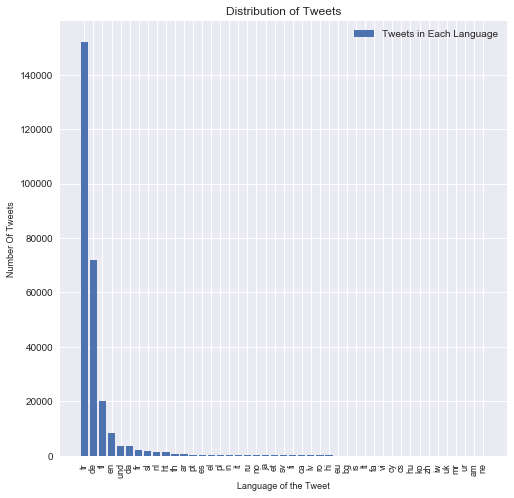

In [20]:
from matplotlib.pyplot import figure
number_of_tweets_in_each_language=[]
for l in languages:
    number_of_tweets_in_each_language.append((l,len(language_group.get_group(l))))
#print(number_of_tweets_in_each_language)
import operator
number_of_tweets_in_each_language.sort(key=lambda x: x[1], reverse=True)
for i in range(0,len(number_of_tweets_in_each_language)):
    number_of_tweets_in_each_language[i]=number_of_tweets_in_each_language[i][1]
index=np.arange(len(languages))
plt.figure(figsize=(8,8))
plt.style.use('seaborn')
plt.bar(index, number_of_tweets_in_each_language,label="Tweets in Each Language")
plt.xlabel('Language of the Tweet', fontsize=9)
plt.ylabel('Number Of Tweets', fontsize=9)
plt.xticks(index, languages, fontsize=9, rotation='vertical')
plt.title('Distribution of Tweets')
plt.legend()
plt.show()

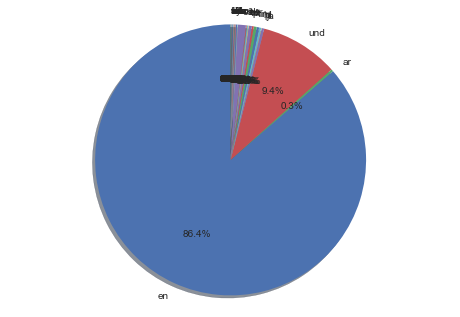

In [46]:
fig1,ax1=plt.subplots()
new_array=np.array(number_of_tweets_in_each_language)
new_array=(new_array*100)/sum(new_array)

new_array

ax1.pie(new_array, labels=languages, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# Polarity of Tweet

In [62]:
from textblob import TextBlob

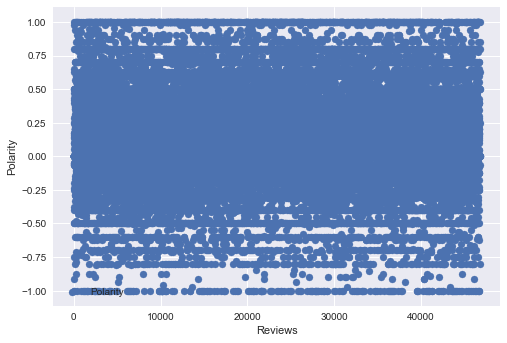

In [63]:
result1=[]
num=1
numlist=[]
for tweet in data.tweet_text:
    analysis=TextBlob(tweet)
    result1.append(analysis.polarity)
    numlist.append(num)
    num=num+1
result1=np.array(result1)

plt.style.use('seaborn')
plt.scatter(numlist,result1,label='Polarity')
plt.xlabel('Reviews')
plt.ylabel('Polarity')
plt.legend()


# Word Dictionary

In [95]:
from collections import defaultdict
import re
d=defaultdict(int)
REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
dd = [REPLACE_NO_SPACE.sub("", line.lower()) for line in data.tweet_text]
dd = [REPLACE_WITH_SPACE.sub(" ", line) for line in data.tweet_text]

for sent in dd:
    words=sent.split()
    for word in words:
        d[word]+=1
d.items()

sorted_items=sorted(d.items(), key=lambda x:x[1],reverse=True)
sorted_items

[('t.co', 24532),
 ('https:', 24523),
 ('the', 12834),
 ('I', 10474),
 ('to', 10363),
 ('a', 9517),
 ('and', 7009),
 ('is', 5873),
 ('of', 5706),
 ('in', 5699),
 ('for', 4706),
 ('you', 4675),
 ('my', 3979),
 ('this', 3684),
 ('that', 3408),
 ('on', 3343),
 ('it', 2872),
 ('at', 2713),
 ('with', 2566),
 ('was', 2400),
 ('be', 2377),
 ('me', 2123),
 ('have', 2101),
 ('are', 2063),
 ('like', 2043),
 ('so', 1963),
 ('but', 1893),
 ('just', 1786),
 ('I’m', 1675),
 ('not', 1672),
 ('The', 1621),
 ('your', 1462),
 ('about', 1443),
 ('all', 1338),
 ('from', 1308),
 ('This', 1206),
 ('out', 1202),
 ('we', 1194),
 ('get', 1163),
 ('up', 1155),
 ('as', 1110),
 ('an', 1074),
 ('do', 1061),
 ('they', 1025),
 ('one', 1016),
 ('@', 1003),
 ('can', 999),
 ('when', 998),
 ('i', 993),
 ('what', 991),
 ('by', 987),
 ('our', 975),
 ('if', 969),
 ('know', 880),
 ('You', 871),
 ('don’t', 849),
 ('he', 833),
 ('or', 801),
 ('who', 797),
 ('how', 794),
 ('has', 794),
 ('will', 791),
 ('time', 787),
 ('see', 

In [98]:
from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    return removed_stop_words

no_stop_words = remove_stop_words(dd)
dddd=defaultdict(int)
for sent in no_stop_words:
    words=sent.split()
    for word in words:
        dddd[word]+=1
dddd.items()

sorted_items=sorted(dddd.items(), key=lambda x:x[1],reverse=True)
sorted_items

[('t.co', 24532),
 ('https:', 24523),
 ('I', 10474),
 ('like', 2043),
 ('I’m', 1675),
 ('The', 1621),
 ('This', 1206),
 ('get', 1163),
 ('one', 1016),
 ('@', 1003),
 ('know', 880),
 ('You', 871),
 ('don’t', 849),
 ('time', 787),
 ('see', 784),
 ('love', 783),
 ('people', 737),
 ('Seattle', 736),
 ('&amp;', 735),
 ('it’s', 719),
 ('got', 705),
 ('think', 684),
 ("I'm", 683),
 ('really', 671),
 ('My', 669),
 ('would', 660),
 ('good', 659),
 ('.', 654),
 ('We', 620),
 ('Seattle,', 620),
 ('go', 619),
 ('need', 611),
 ('want', 607),
 ('It’s', 603),
 ('If', 567),
 ('It', 555),
 ('going', 542),
 ('And', 541),
 ('work', 534),
 ('day', 533),
 ('A', 519),
 ('much', 519),
 ('make', 517),
 ('back', 502),
 ('job', 496),
 ('😂', 489),
 ('still', 478),
 ('So', 470),
 ('What', 461),
 ('Thank', 449),
 ('last', 442),
 ('even', 440),
 ('great', 440),
 ('never', 437),
 ('first', 420),
 ('new', 410),
 ('Just', 400),
 ('That', 399),
 ('say', 397),
 ('I’ve', 394),
 ('take', 393),
 ('way', 390),
 ('lol', 389)

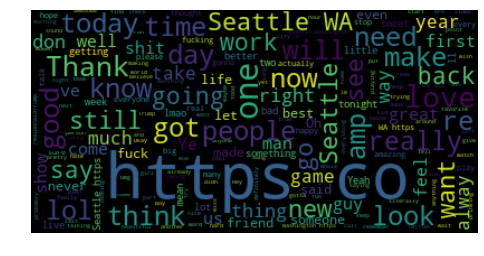

In [99]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text=''

for i in data.tweet_text:
    text=text+i+' '
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()